In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from __future__ import print_function
from collections import OrderedDict

import os
import sys
import timeit
import pickle

import scipy.io as sio
import numpy as np
import theano
import theano.tensor as T

#add the path of Folder Model
sys.path.insert(0, "/home/cwhuang/DVTL/Model/")
import nnet as nn
import criteria	as er
import util
import DANN

import TwinMoonFeaturePlot as fp

WARNING (theano.sandbox.cuda): CUDA is installed, but device gpu is not available  (error: Unable to get the number of gpus available: invalid argument)


number of minibatch at one epoch: 10, batch size source : 100, target : 100 
 validation size, S:600, T:600, test size, S:400, T:400
... building the model
Encoder is constructed with hidden layer number 1
Classifier is constructed with hidden layer number 0
DomainClassifier is constructed with hidden layer number 0
Encoder is constructed with hidden layer number 1
Classifier is constructed with hidden layer number 0
DomainClassifier is constructed with hidden layer number 0
Encoder is constructed with hidden layer number 1
Classifier is constructed with hidden layer number 0
DomainClassifier is constructed with hidden layer number 0
... training
Initial, test accuracy: source domain :50.000000 %, target domain 50.000000 %
epoch 1, minibatch 10/10, training loss -2.786495, validation loss -2.786428 
     epoch 1, minibatch 10/10, test accuracy of best model: source domain :50.000000 %, target domain 50.000000 %
epoch 2, minibatch 10/10, training loss -2.825513, validation loss -2.81384

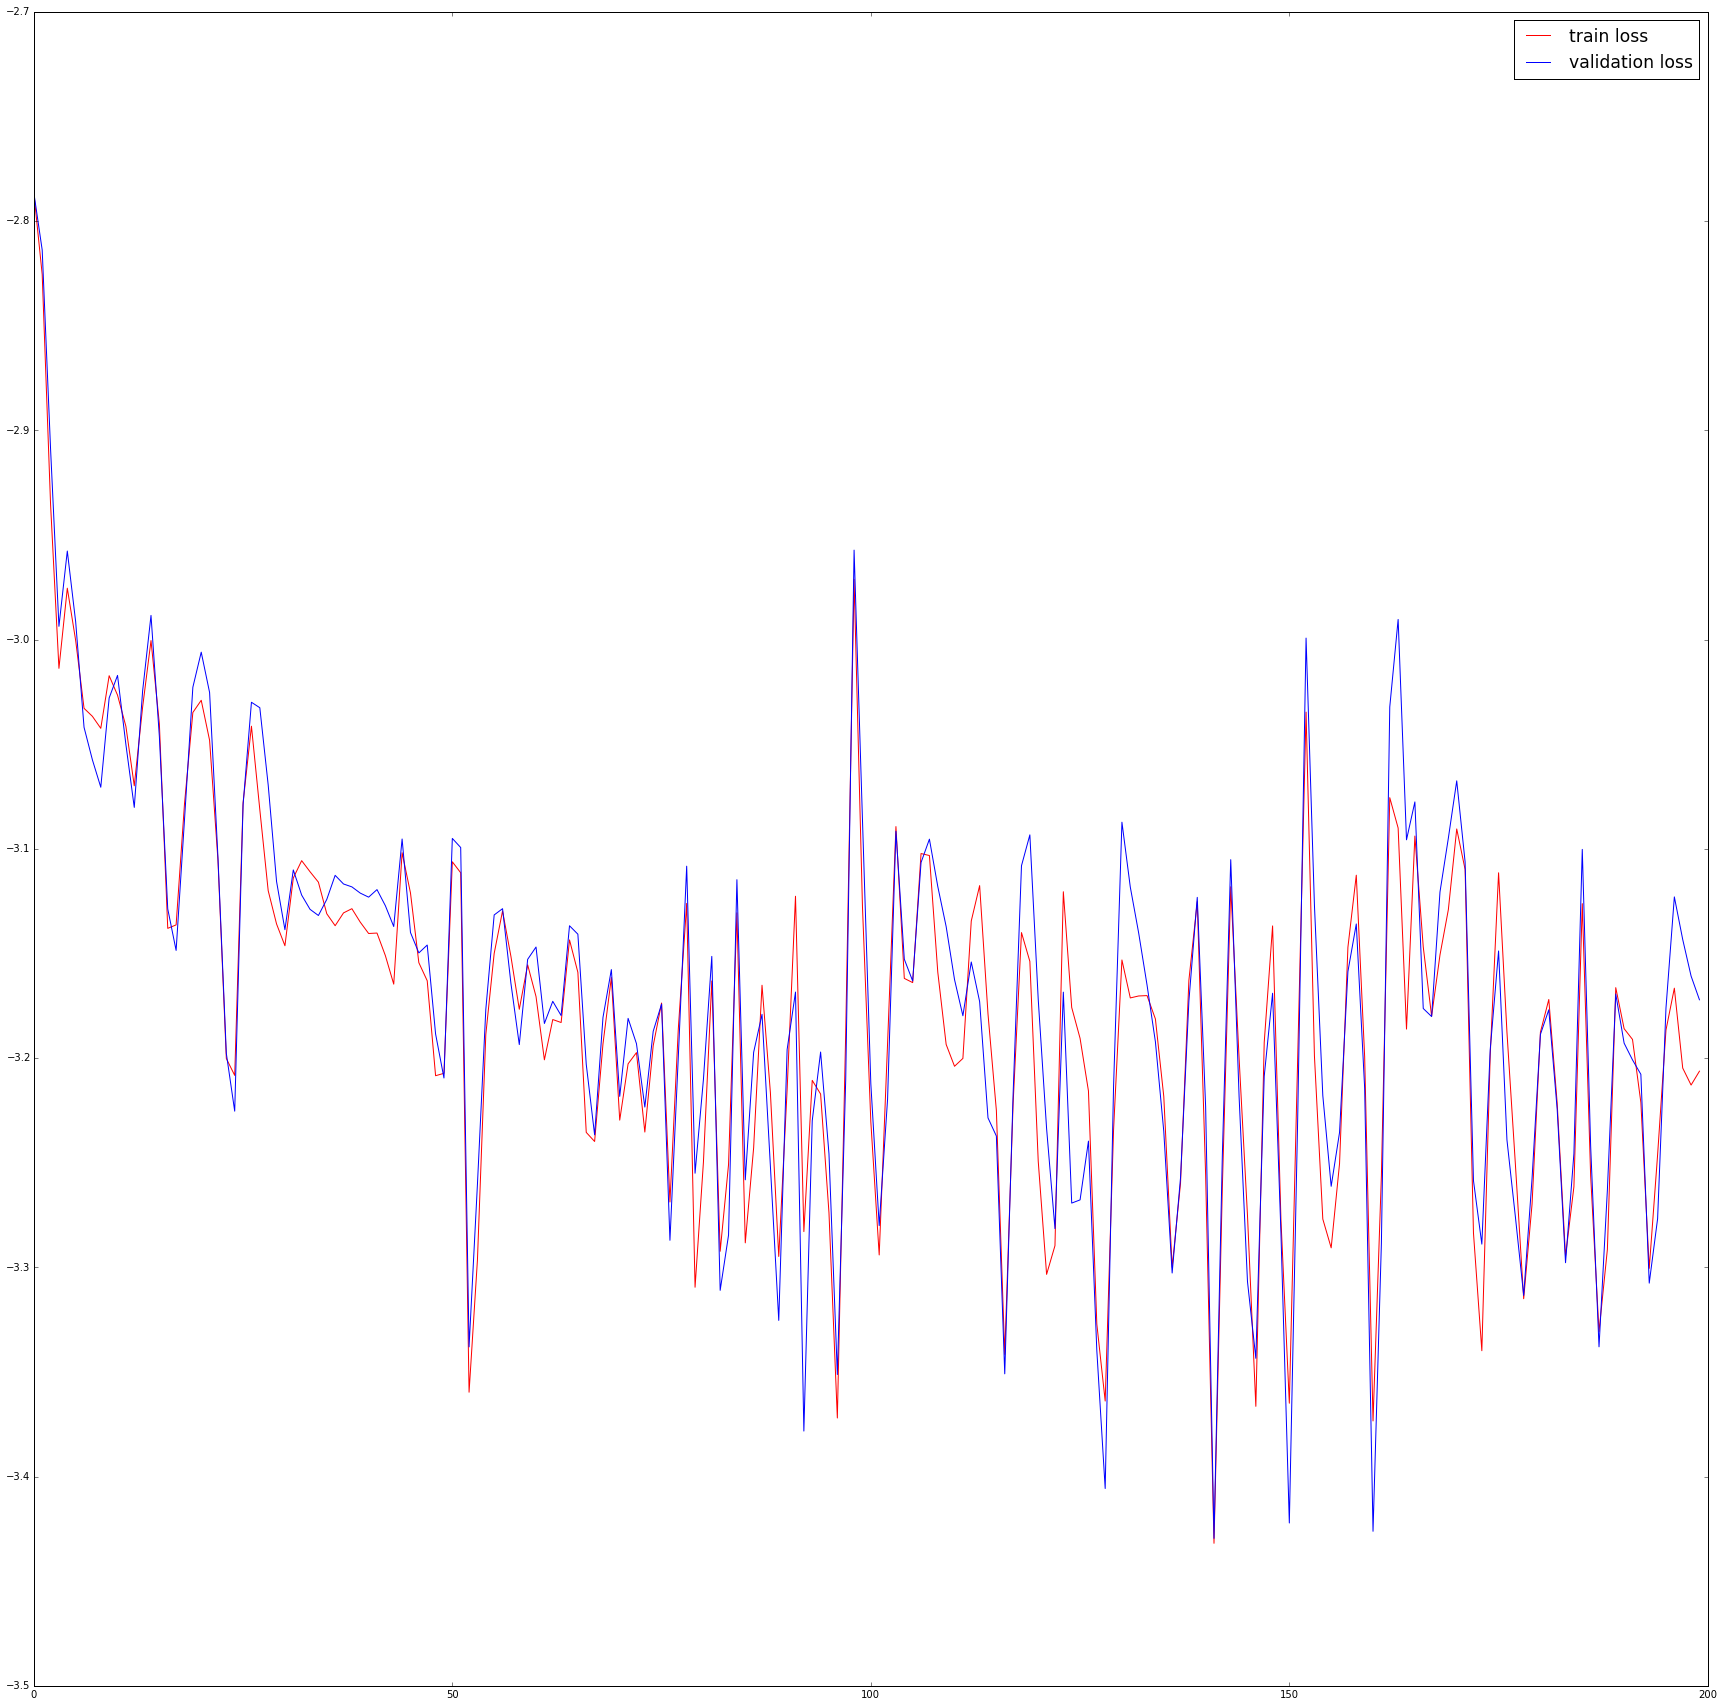

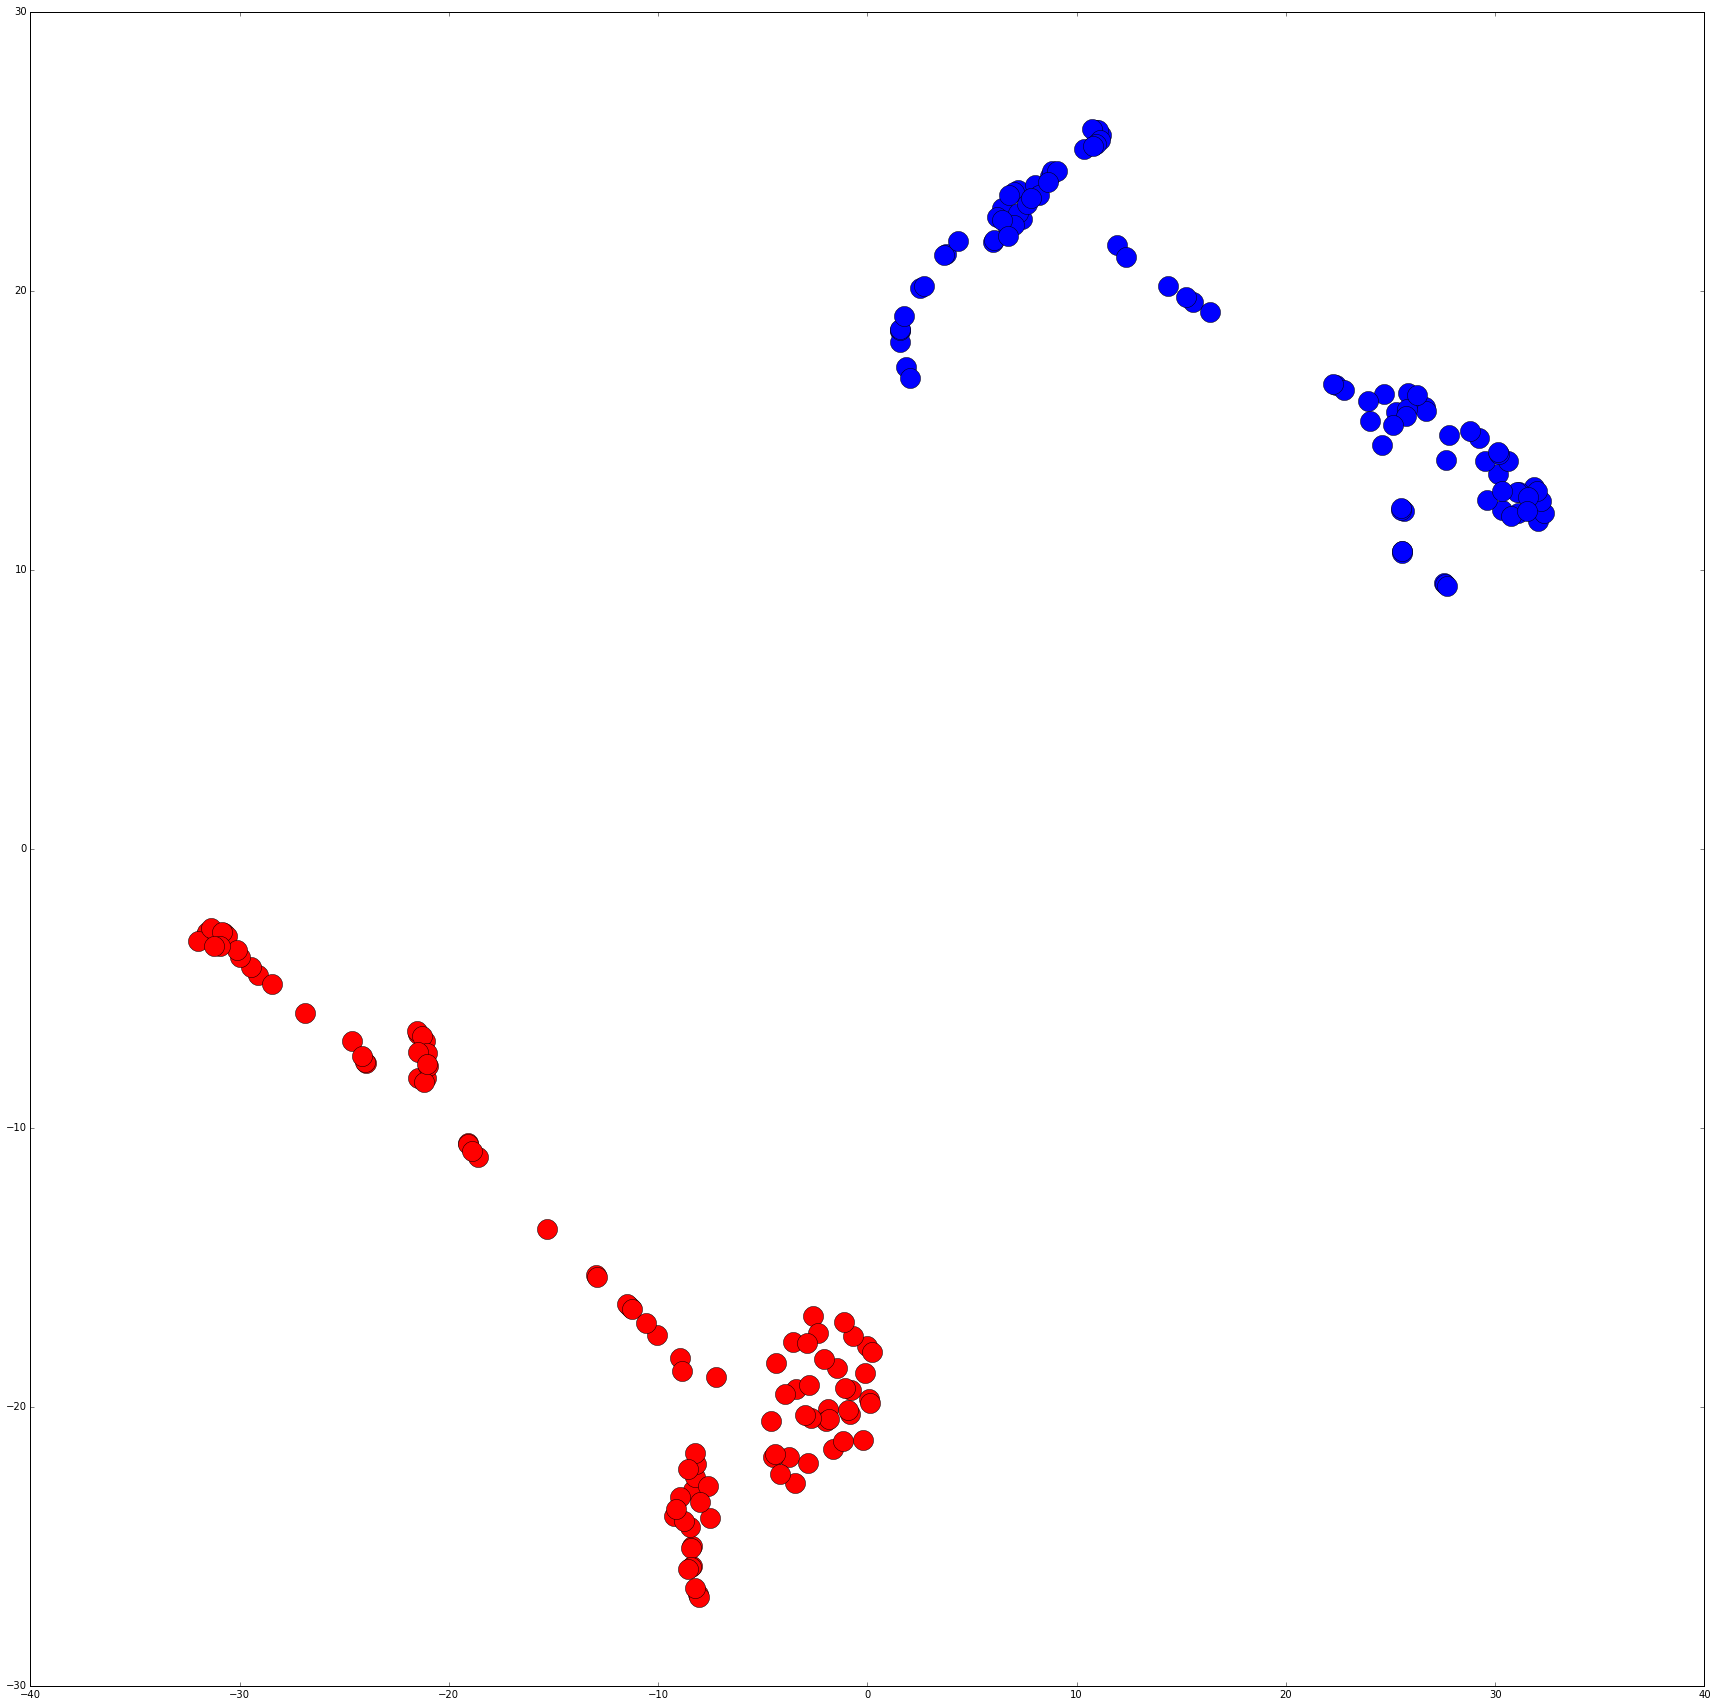

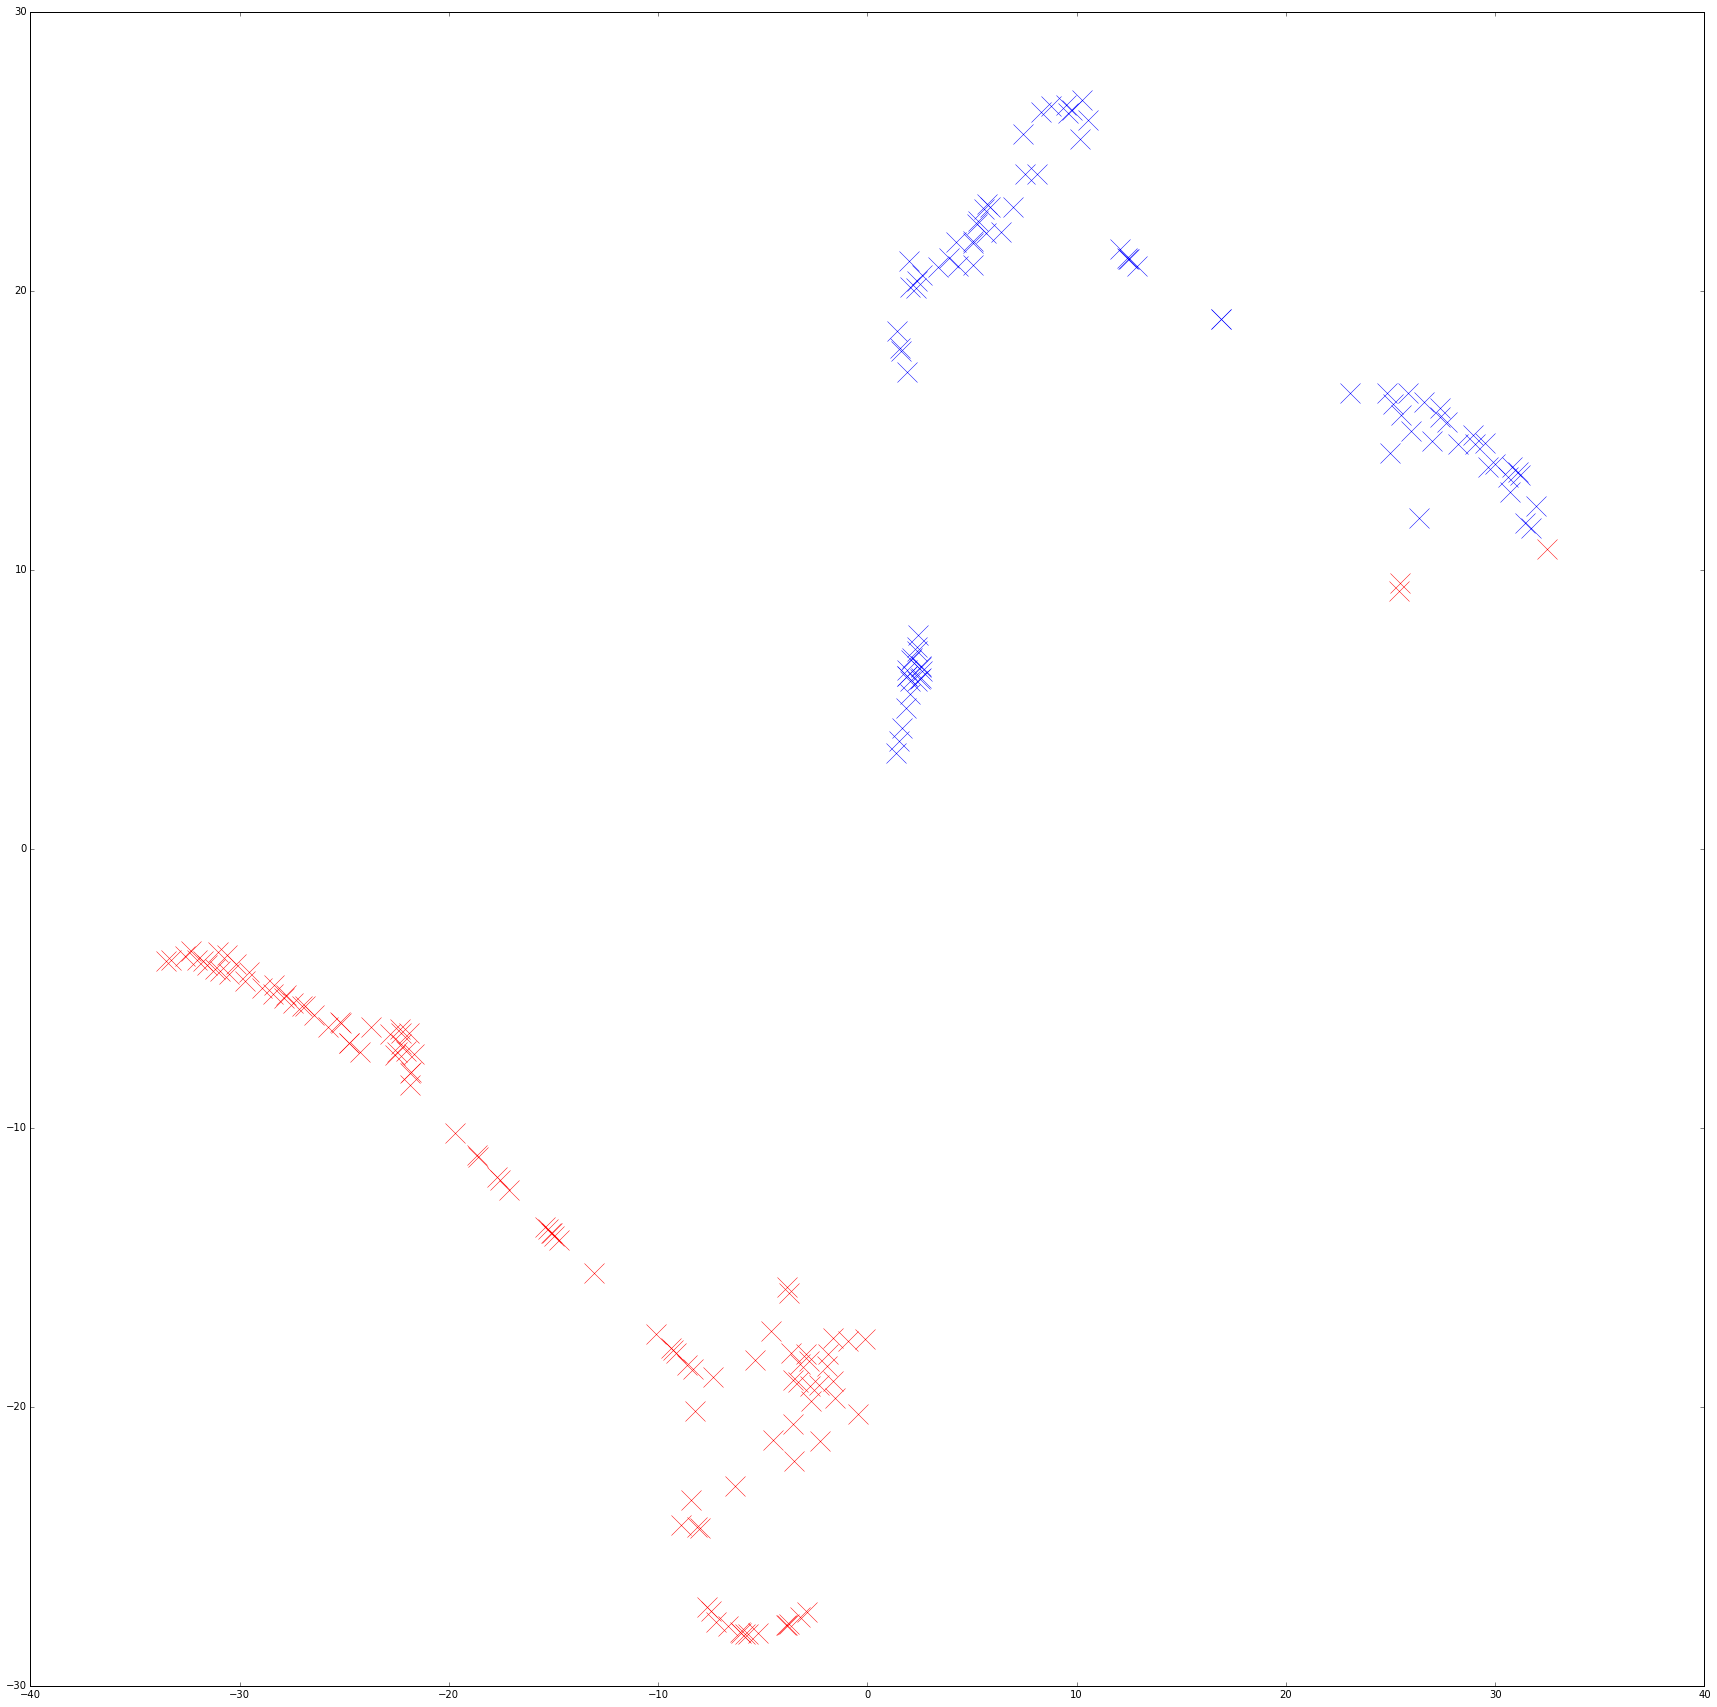

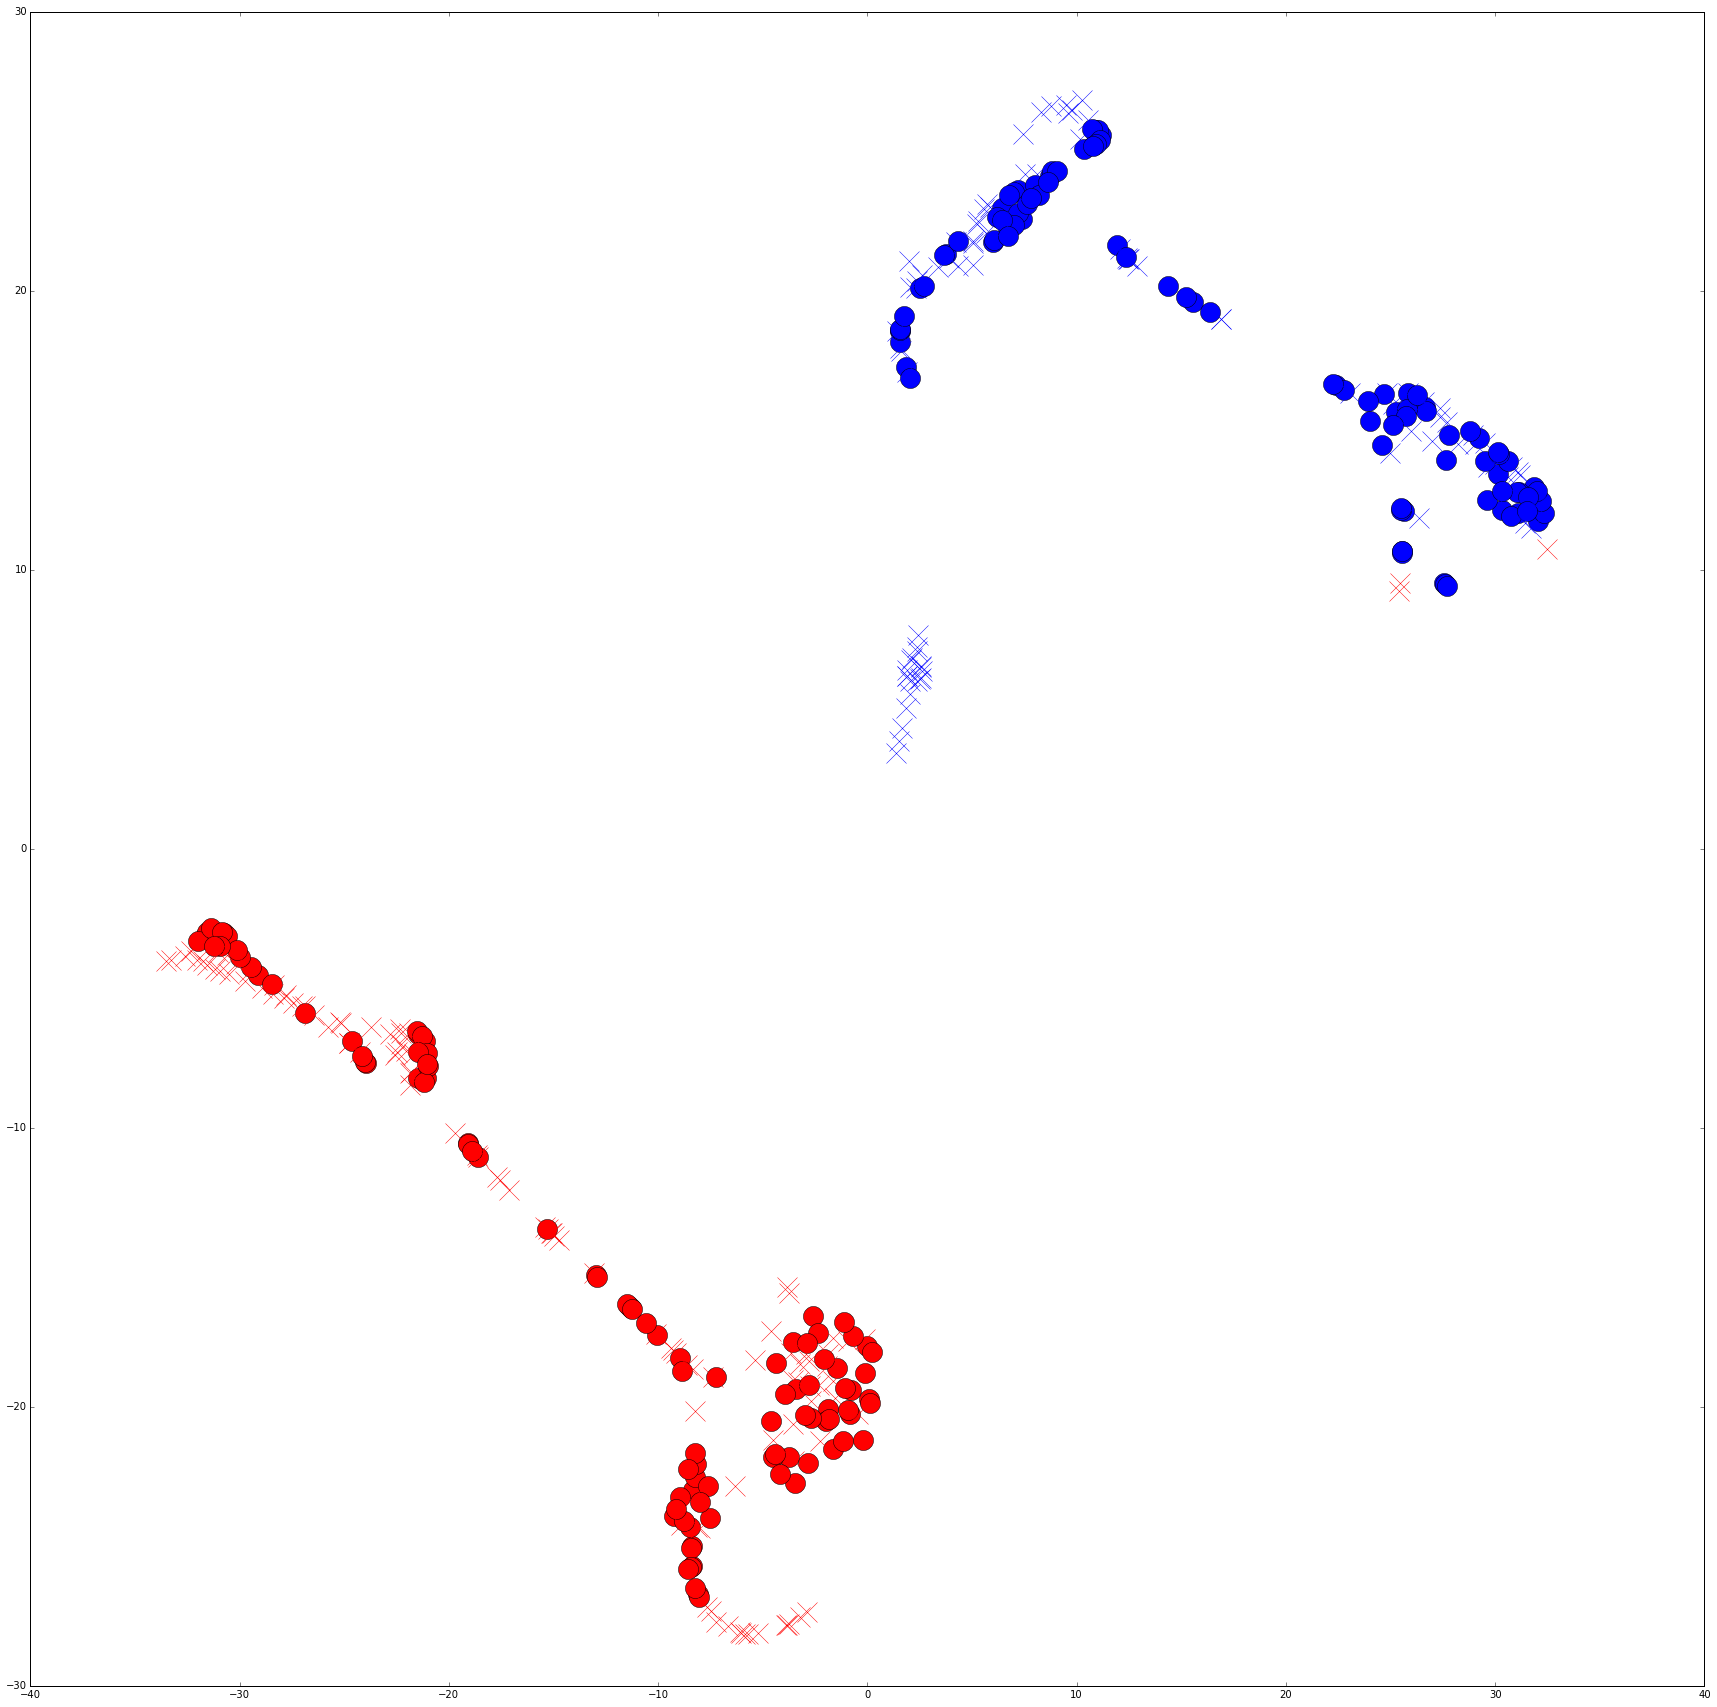

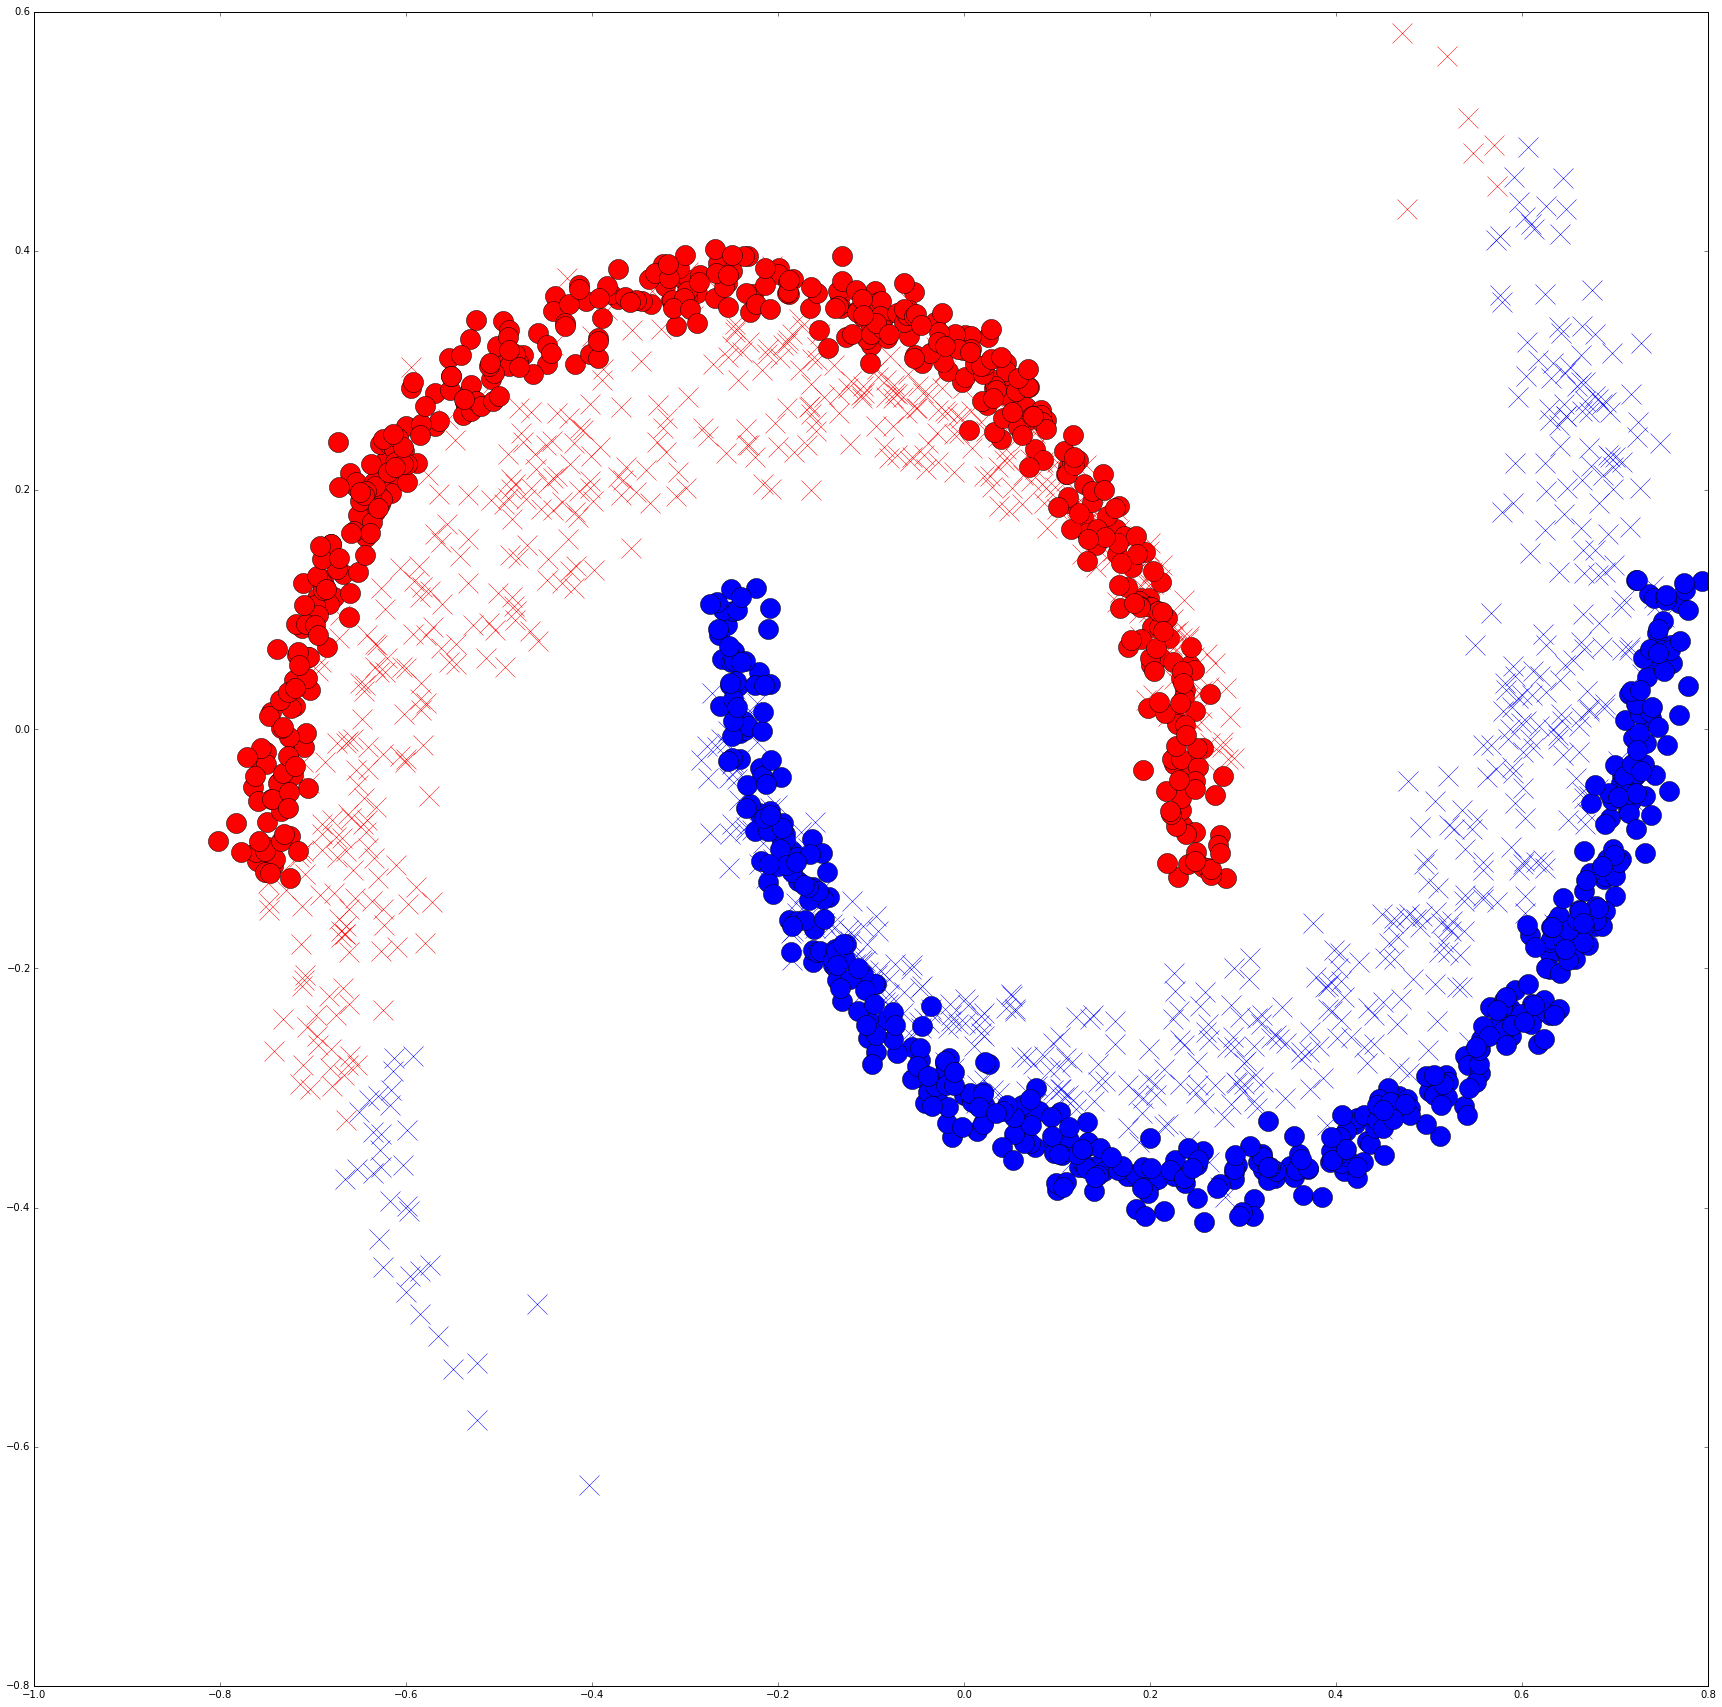

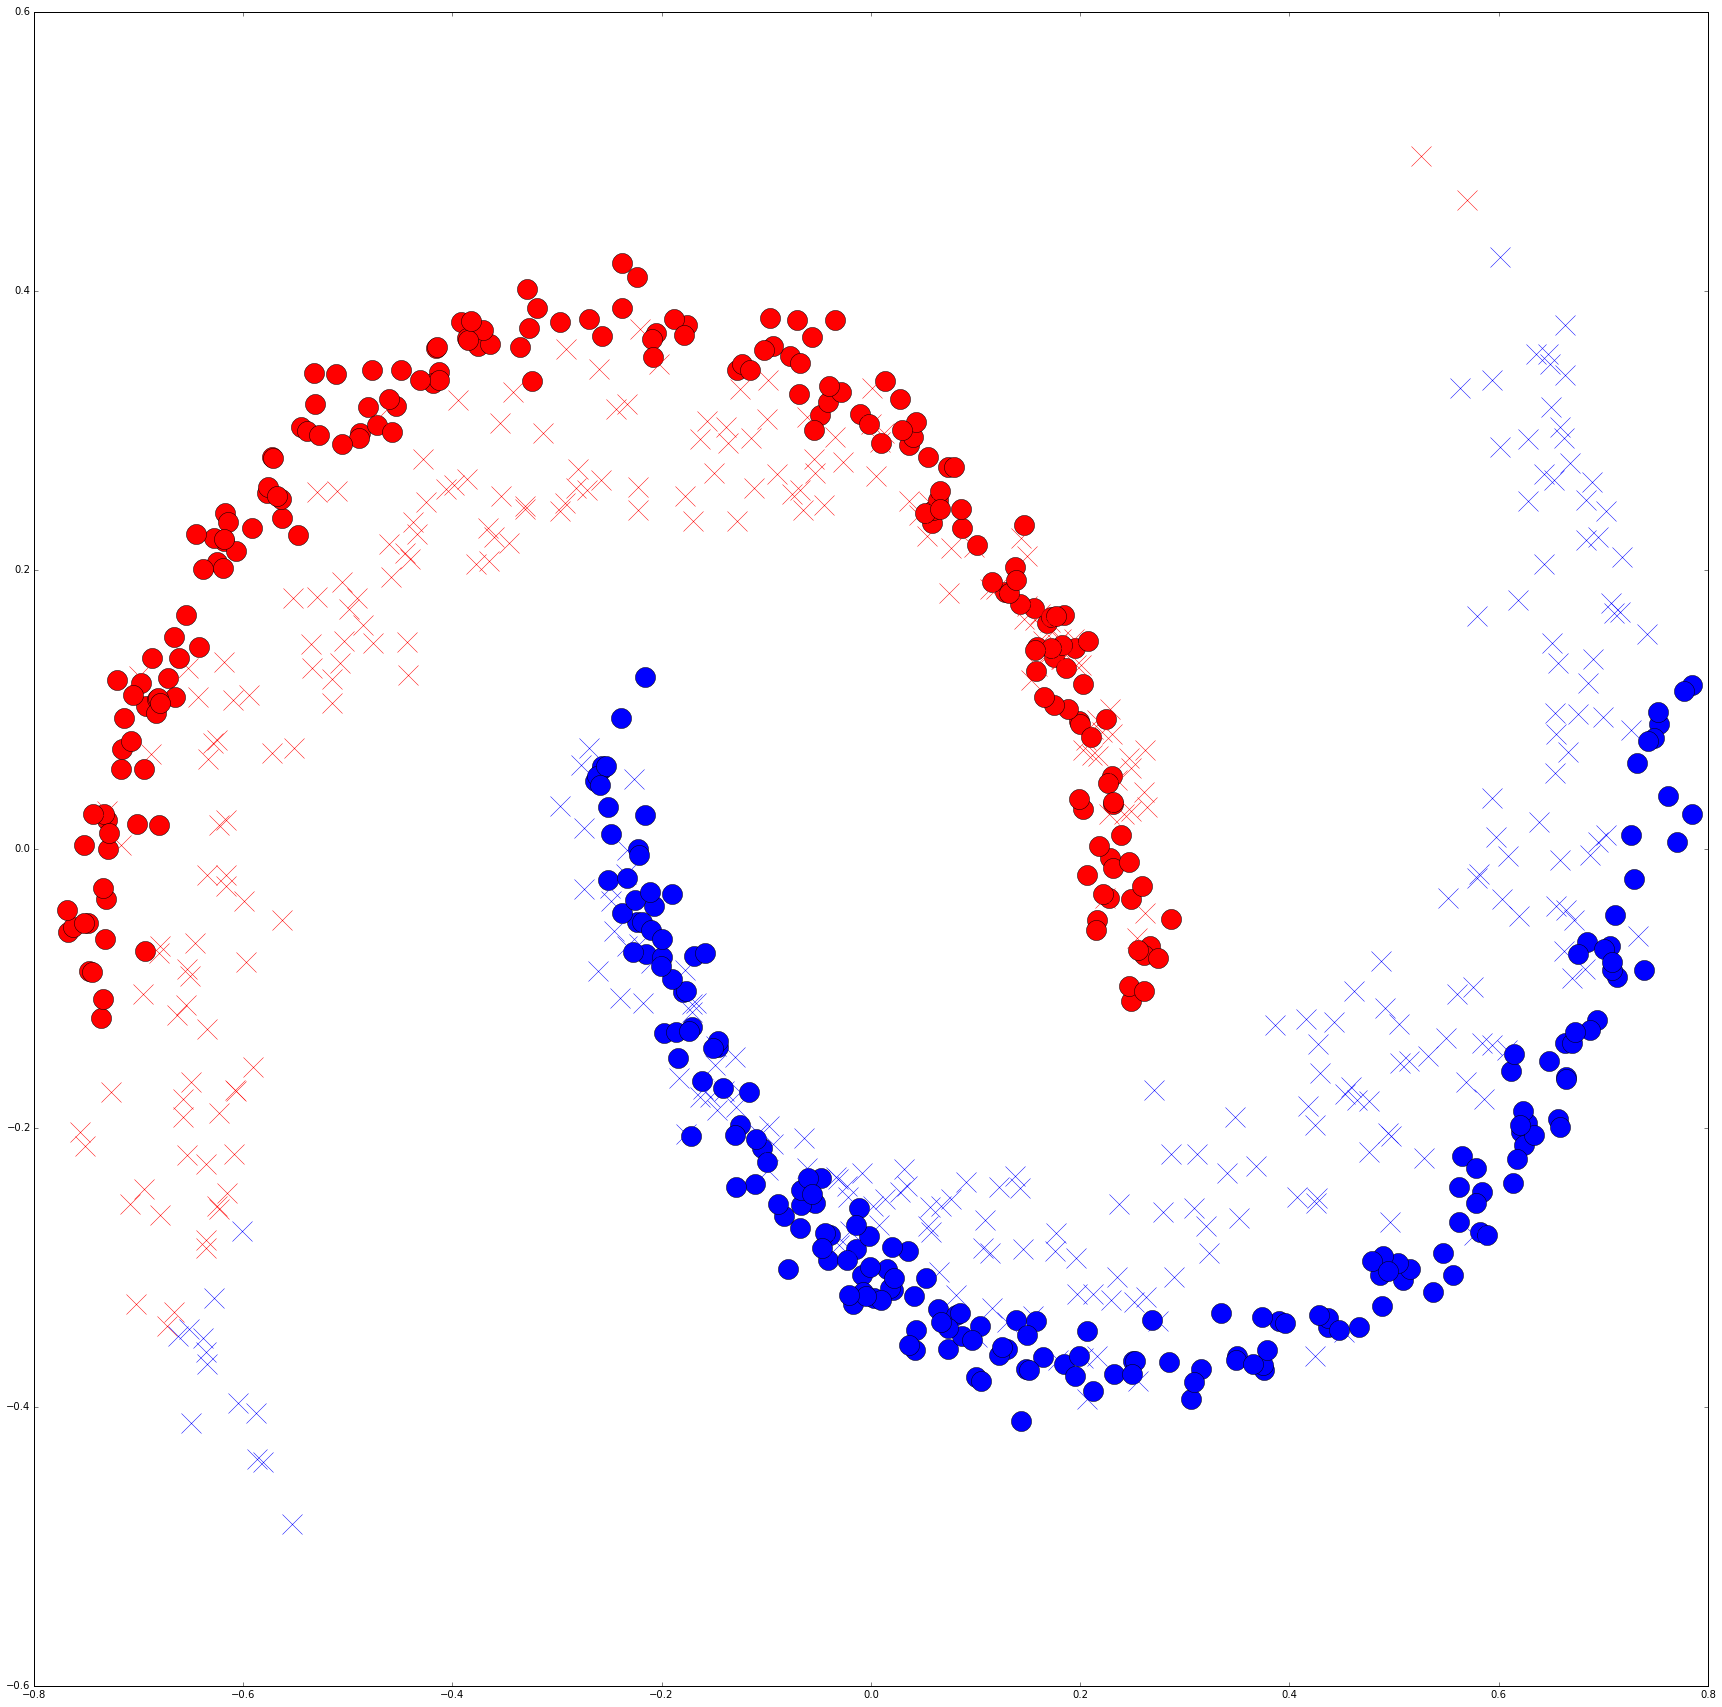

In [2]:
'''Model Construct'''
if __name__ == '__main__':
    
    file = '/home/cwhuang/DVTL/Dataset/Synthetic_Data/Twin_moon.npy'
    data = np.load(file)

    train_fts_source, train_labels_source = data[0]
    valid_fts_source, valid_labels_source = data[1]
    test_fts_source, test_labels_source = data[2]
    
    train_fts_target, train_labels_target = data[3]
    valid_fts_target, valid_labels_target = data[4]
    test_fts_target, test_labels_target = data[5]
    
    source_data = [(train_fts_source, train_labels_source), (valid_fts_source, valid_labels_source), (test_fts_source, test_labels_source)]
    target_data = [(train_fts_target, train_labels_target), (valid_fts_target, valid_labels_target), (test_fts_target, test_labels_target)]     
    
    ########################################################################
    ###                        Coefficient Initial                       ###
    ########################################################################            
    
    x_dim = 2
    y_dim = 2
    d_dim = 2
    z_dim = 5               #dimension of latent feature    
    h_dim = 10             #dimension of hidden unit      
    activation = T.nnet.sigmoid
    learning_rate = 0.05

    struct = DANN.DANN_struct()        
    struct.encoder.layer_dim = [x_dim, h_dim, z_dim]
    struct.encoder.activation = [activation, activation]
    struct.encoder.learning_rate = [learning_rate, learning_rate]
    struct.encoder.decay = [1, 1]                
    struct.classifier.layer_dim = [z_dim, y_dim]
    struct.classifier.activation = [T.nnet.softmax]   
    struct.classifier.learning_rate = [learning_rate, learning_rate]
    struct.classifier.decay = [1, 1]  
    struct.DomainClassifier.layer_dim = [z_dim, d_dim]
    struct.DomainClassifier.activation = [T.nnet.softmax]
    struct.DomainClassifier.learning_rate = [learning_rate, learning_rate]
    struct.DomainClassifier.decay = [1, 1]     
        
    coef = DANN.DANN_coef(        
        beta = 5,
        optimize = 'Adam_update'           
    )         
        
    description = 'Test_TwinMoon_DANN_%s' % (coef.optimize)   
    
    features_model, test_model, trained_param = DANN.DANN_training(
        source_data = source_data,
        target_data = target_data,
        n_train_batches = 10,
        n_epochs = 200,
        k = 1,
        struct = struct,
        coef = coef,
        description = description
    )
    
    sample_n = 200
    fp.features_plot(features_model, test_model, source_data, target_data, sample_n, description)    